# Install libraries

In [1]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Core analysis packages
import numpy as np
import pingouin as pg
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import matplotlib.pyplot as plt

# import bff 
#Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

from patsy import dmatrices

#import researchpy - not sure what this is either- just dont have the right environment

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

/Users/katiemason/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Autosaving every 30 seconds


# Point estimates for condition effect retrieved from lmer models in R

In [3]:
# Import the belief point estimates

belief_est = pd.read_excel("All_Cond_Estimates_Belief.xlsx")

# Sort by descending

belief_est = belief_est.sort_values(by=['est'], ascending=False)
belief_est

,country,lower,est,upper
16,USA,4.006958,5.480276,6.953594
2,Canada,0.179947,5.050452,9.920957
9,Netherlands,1.327582,4.608328,7.889074
1,Brazil,-0.569311,3.459977,7.489266
6,Israel,-1.520880,2.241352,6.003585
8,Japan,-1.553992,1.997212,5.548416
10,Nigeria,-2.243703,1.807050,5.857803
3,Chile,-5.311031,1.700205,8.711441
7,Italy,-3.101303,0.859265,4.819833
11,Poland,-2.272522,0.752921,3.778363


<IPython.core.display.Javascript object>


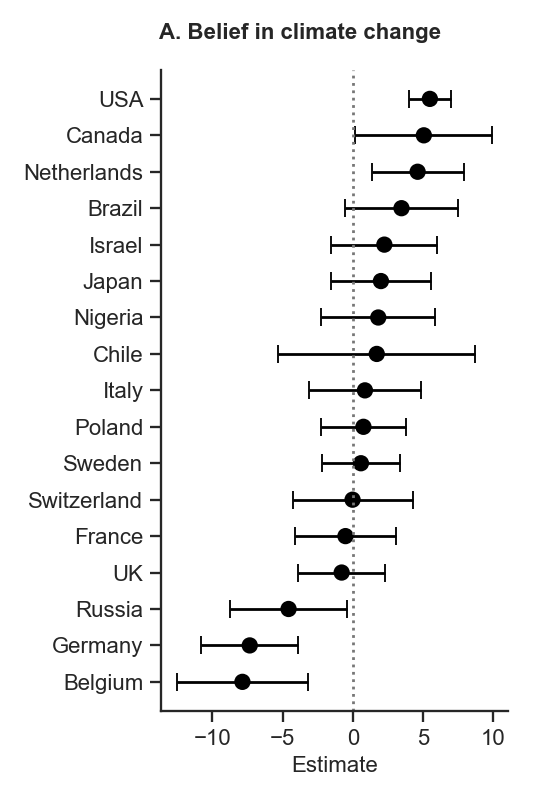

In [4]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=belief_est["country"], x=belief_est["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=belief_est["est"], y=belief_est["country"], xerr=[belief_est["est"] - belief_est["lower"], belief_est["upper"] - belief_est["est"]], fmt='none', markersize=8, capsize=5, color='black')
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("A. Belief in climate change", fontweight='bold', y=1.03, x = .4, fontsize=12)  

ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Belief_PointEst_Country.pdf', dpi=300, format="pdf", bbox_inches='tight')


In [5]:
# Belief with ideology included 

Lib_Con_Belief = pd.read_excel("Lib_Con_Belief.xlsx")
Lib_Con_Belief

,Country,Ideology,lower,est.,upper
0,USA,Liberal,3.424960,5.818857,8.212755
1,USA,Conservative,3.197227,5.141694,7.086161
2,Canada,Liberal,-1.851853,4.580250,11.012354
3,Canada,Conservative,-4.433191,5.520654,15.474498
4,Netherlands,Liberal,-4.718438,0.739375,6.197188
5,Netherlands,Conservative,2.501706,8.477280,14.452854
6,Brazil,Liberal,-1.599266,5.011303,11.621872
7,Brazil,Conservative,-2.641468,1.908652,6.458771
8,Israel,Liberal,-11.414635,-4.898369,1.617896
9,Israel,Conservative,3.972838,9.381074,14.789310


<IPython.core.display.Javascript object>


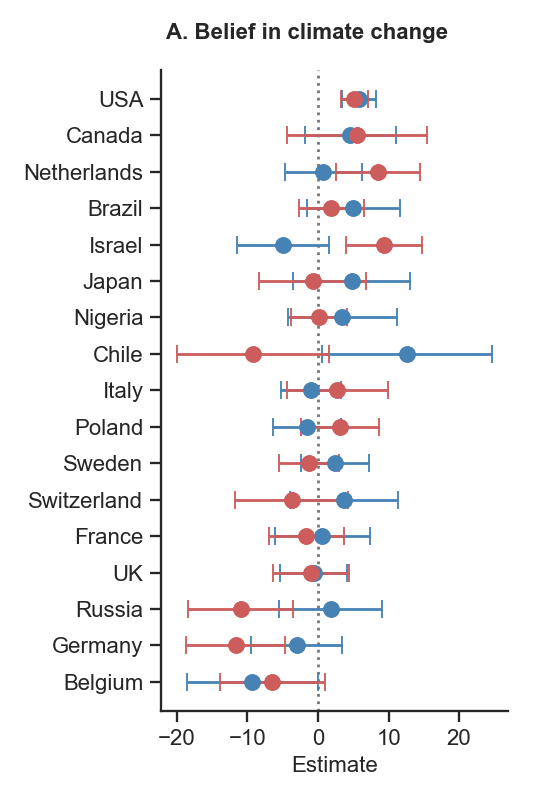

In [6]:
# Point plot using exact estimates + CIs from lmer models. Includes ideology.

# Colors for liberals and conservatives 
palette = {'Liberal':'#4682B4' , 'Conservative': '#CD5C5C'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Lib_Con_Belief["Country"],
    x=Lib_Con_Belief["est."],
    hue=Lib_Con_Belief["Ideology"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("A. Belief in climate change", fontweight='bold', y=1.03, x = .42, fontsize=12)  

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Lib_Con_Belief.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Ideology"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Belief_PointEst_Country_Ide.pdf', dpi=900, format="pdf")


In [9]:
# Import the policy point estimates

policy_est = pd.read_excel("All_Cond_Estimates_Policy.xlsx")

# Sort by descending

policy_est = policy_est.sort_values(by=['est'], ascending=False)
policy_est

,country,lower,est,upper
1,Brazil,2.549108,5.463884,8.378660
16,USA,2.726211,3.774460,4.822710
6,Israel,-0.641327,2.086358,4.814044
13,Sweden,-0.083471,1.898388,3.880247
11,Poland,-0.248359,1.896760,4.041879
7,Italy,-1.589685,1.204083,3.997851
9,Netherlands,-1.215008,1.105977,3.426962
10,Nigeria,-2.290468,0.658713,3.607895
4,France,-2.061544,0.462161,2.985867
2,Canada,-3.096783,0.336366,3.769516


<IPython.core.display.Javascript object>


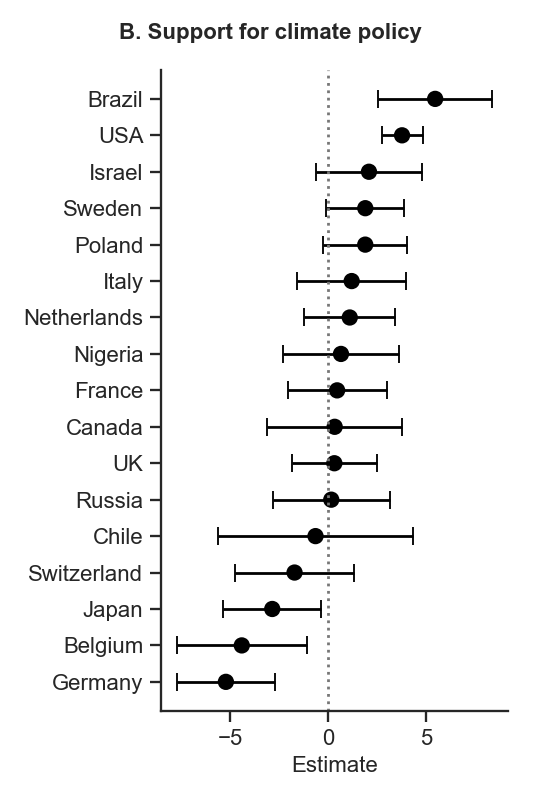

In [10]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=policy_est["country"], x=policy_est["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=policy_est["est"], y=policy_est["country"], xerr=[policy_est["est"] - policy_est["lower"], policy_est["upper"] - policy_est["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("B. Support for climate policy", fontweight='bold', y=1.03, x = .315, fontsize=12)  

ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Policy_PointEst_Country.pdf', dpi=300, format="pdf", bbox_inches='tight')


In [11]:
# Policy with ideology included 

Lib_Con_Policy = pd.read_excel("Lib_Con_Policy.xlsx")
Lib_Con_Policy

,Country,Ideology,lower,est.,upper
0,Brazil,Liberal,1.409594,6.184040,10.958486
1,Brazil,Conservative,1.401734,4.743728,8.085723
2,USA,Liberal,2.775584,4.477116,6.178649
3,USA,Conservative,1.688937,3.071804,4.454671
4,Israel,Liberal,-5.940309,-1.202599,3.535111
5,Israel,Conservative,1.471265,5.375316,9.279367
6,Sweden,Liberal,-1.221985,2.171951,5.565888
7,Sweden,Conservative,-1.331035,1.624824,4.580684
8,Poland,Liberal,-1.236845,2.182011,5.600866
9,Poland,Conservative,-2.296922,1.611509,5.519939


<IPython.core.display.Javascript object>


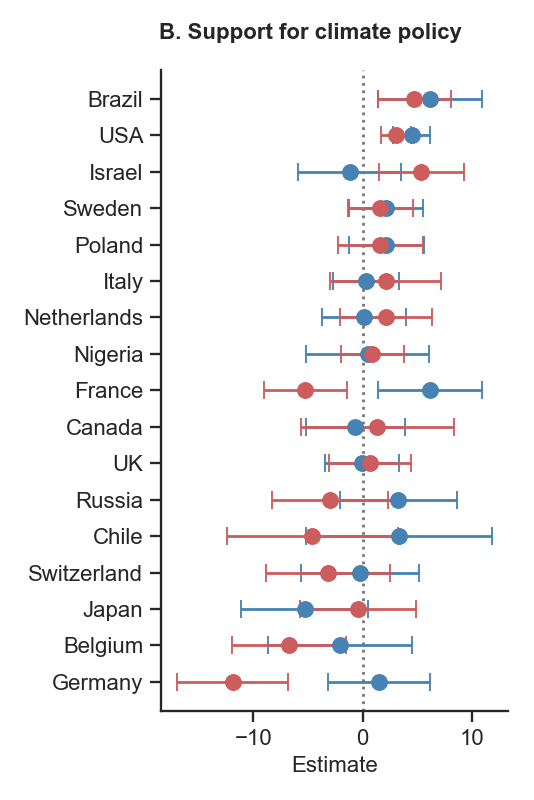

In [12]:
# Point plot using exact estimates + CIs from lmer models. Includes ideology.

# Colors for liberals and conservatives 
palette = {'Liberal':'#4682B4' , 'Conservative': '#CD5C5C'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Lib_Con_Policy["Country"],
    x=Lib_Con_Policy["est."],
    hue=Lib_Con_Policy["Ideology"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("B. Support for climate policy", fontweight='bold', y=1.03, x = .43, fontsize=12)  

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Lib_Con_Policy.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Ideology"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Policy_PointEst_Country_Ide.jpeg', dpi=900, format="jpeg")

# plt.savefig('Policy_PointEst_Country_Ide.pdf', dpi=900, format="pdf")


In [13]:
# Import the sharing point estimates

share_est = pd.read_excel("All_Cond_Estimates_Share.xlsx")

# Sort by descending

share_est = share_est.sort_values(by=['est'], ascending=False)
share_est

,country,lower,est,upper
1,Brazil,0.681096,1.526349,2.500556
9,Netherlands,-0.235437,0.550265,1.361255
3,Chile,-1.033652,0.404039,1.961904
16,USA,0.100935,0.375964,0.651915
14,Switzerland,-0.590307,0.366987,1.337192
8,Japan,-0.611776,0.359678,1.367827
12,Russia,-0.605108,0.336861,1.286045
2,Canada,-0.656137,0.329667,1.357150
6,Israel,-0.761963,0.176380,1.115376
4,France,-0.516785,0.175019,0.867135


<IPython.core.display.Javascript object>


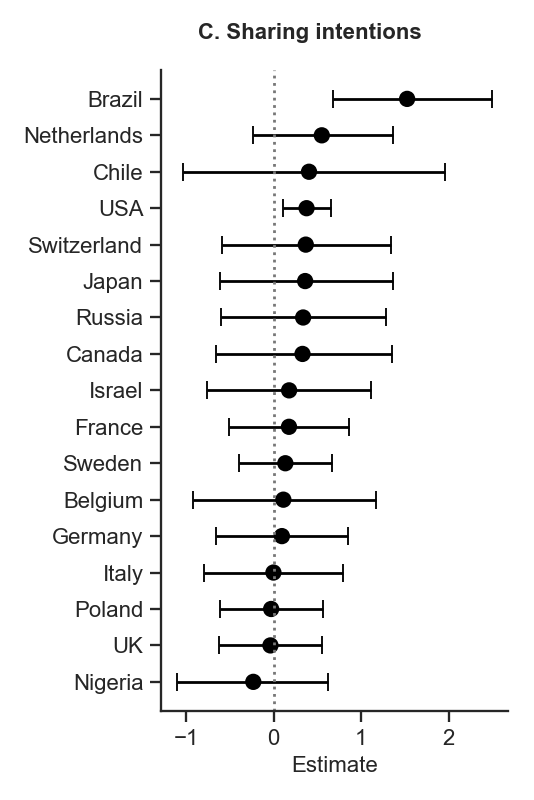

In [14]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=share_est["country"], x=share_est["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=share_est["est"], y=share_est["country"], xerr=[share_est["est"] - share_est["lower"], share_est["upper"] - share_est["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("C. Sharing intentions", fontweight='bold',  y=1.03, x = .43, fontsize=12)

ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Share_PointEst_Country.pdf', dpi=900, format="pdf", bbox_inches='tight')

In [15]:
# Sharing with ideology included 

Lib_Con_Share = pd.read_excel("Lib_Con_Share.xlsx")
Lib_Con_Share

,country,Ideology,lower,est,upper
0,Brazil,Liberal,0.945982,2.351691,4.000033
1,Brazil,Conservative,-0.167179,0.701006,1.593660
2,Netherlands,Liberal,-0.139478,1.098353,2.451035
3,Netherlands,Conservative,-1.390305,0.002176,1.394391
4,Chile,Liberal,-1.664360,0.841492,3.702549
5,Chile,Conservative,-2.187206,-0.033414,2.106967
6,USA,Liberal,-0.130219,0.313570,0.758648
7,USA,Conservative,0.083539,0.438358,0.795618
8,Switzerland,Liberal,-0.929709,0.681486,2.362032
9,Switzerland,Conservative,-1.856406,0.052488,2.003300


<IPython.core.display.Javascript object>


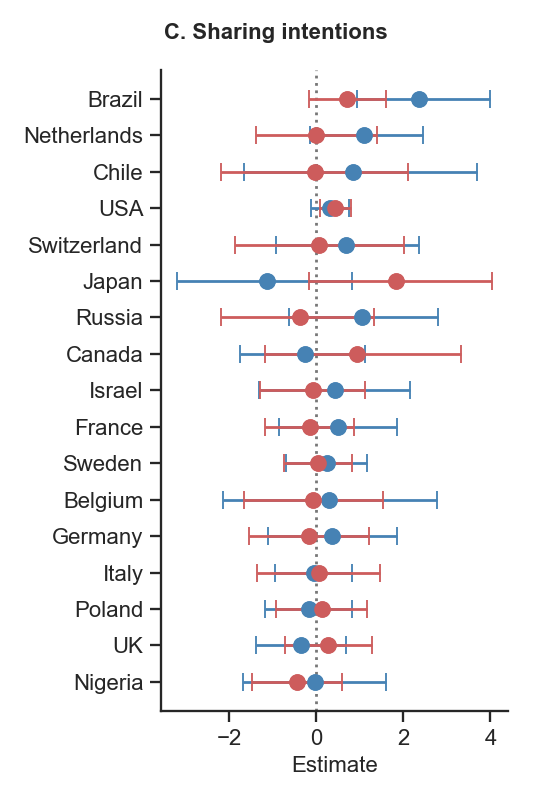

In [16]:
# Point plot using exact estimates + CIs from lmer models. Includes ideology.

# Colors for liberals and conservatives 
palette = {'Liberal':'#4682B4' , 'Conservative': '#CD5C5C'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Lib_Con_Share["country"],
    x=Lib_Con_Share["est"],
    hue=Lib_Con_Share["Ideology"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("C. Sharing intentions", fontweight='bold', y=1.03, x = .33, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Lib_Con_Share.iterrows(): # For each row of the data frame 
    x = row["est"]
    y = row["country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Ideology"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Share_PointEst_Country_Ide.pdf', dpi=900, format="pdf")


In [17]:
# Import the action point estimates

action_est = pd.read_excel("All_Cond_Estimates_Action.xlsx")
action_est

# Sort by descending

action_est = action_est.sort_values(by=['est'], ascending=False)
action_est

,country,lower,est,upper
4,France,0.279664,0.819482,1.364232
10,Nigeria,-0.312808,0.304163,0.929871
12,Russia,-0.380400,0.232326,0.844819
13,Sweden,-0.231887,0.171512,0.574970
15,UK,-0.404955,0.045935,0.497148
7,Italy,-0.623594,0.033512,0.683776
11,Poland,-0.481905,0.005272,0.490930
16,USA,-0.321000,-0.099321,0.121898
5,Germany,-0.634560,-0.115788,0.401624
6,Israel,-0.714751,-0.188948,0.333156


<IPython.core.display.Javascript object>


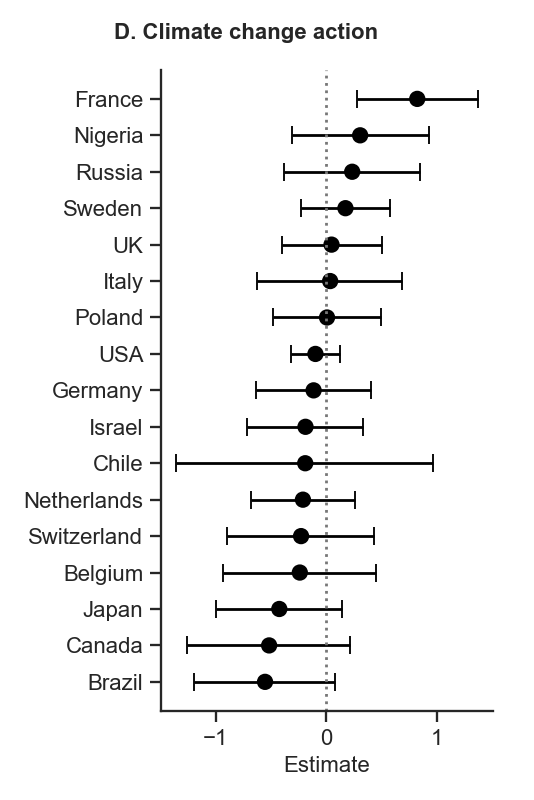

In [18]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=action_est["country"], x=action_est["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=action_est["est"], y=action_est["country"], xerr=[action_est["est"] - action_est["lower"], action_est["upper"] - action_est["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("D. Climate change action", fontweight='bold', y=1.03, x = .255, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Action_PointEst_Country.jpeg', dpi=900, format="jpeg", bbox_inches='tight')

# plt.savefig('Action_PointEst_Country.pdf', dpi=900, format="pdf", bbox_inches='tight')


In [19]:
# Action with ideology included 

Lib_Con_Action = pd.read_excel("Lib_Con_Action.xlsx")
Lib_Con_Action

,country,Ideology,lower,est,upper
0,France,Liberal,0.126526,1.115005,2.132222
1,France,Conservative,-0.333554,0.522024,1.371133
2,Nigeria,Liberal,-0.384768,0.777057,1.974960
3,Nigeria,Conservative,-0.789334,-0.175598,0.435515
4,Russia,Liberal,-1.450418,-0.303263,0.830318
5,Russia,Conservative,-0.367127,0.768747,1.940260
6,Sweden,Liberal,-0.516345,0.178981,0.874532
7,Sweden,Conservative,-0.447498,0.163859,0.776611
8,UK,Liberal,-1.207880,-0.523466,0.151070
9,UK,Conservative,-0.152338,0.614514,1.393194


<IPython.core.display.Javascript object>


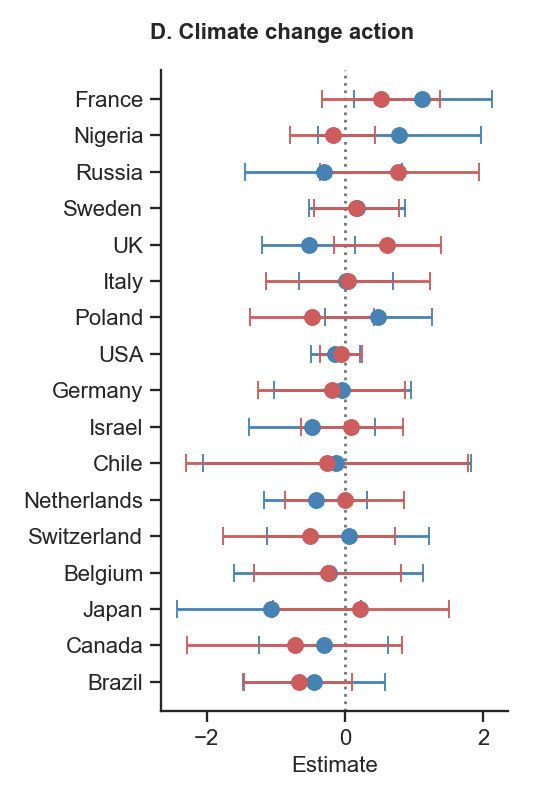

In [27]:
# Point plot using exact estimates + CIs from lmer models. Includes ideology.

# Colors for liberals and conservatives 
palette = {'Liberal':'#4682B4' , 'Conservative': '#CD5C5C'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Lib_Con_Action["country"],
    x=Lib_Con_Action["est"],
    hue=Lib_Con_Action["Ideology"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("D. Climate change action", fontweight='bold', y=1.03, x = .35, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Lib_Con_Action.iterrows(): # For each row of the data frame 
    x = row["est"]
    y = row["country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Ideology"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Remove legend
ax.get_legend().remove()


plt.tight_layout()
plt.show()

# plt.savefig('Action_PointEst_Country_Ide.jpeg', dpi=900, format="jpeg")

# plt.savefig('Action_PointEst_Country_Ide.pdf', dpi=900, format="pdf")


# Suplement: Plotting ideology estimates for each country on each DV 

In [25]:
# Import the belief point estimates

Belief_Ide = pd.read_excel("Belief_Ide.xlsx")

# Sort by descending

Belief_Ide = Belief_Ide.sort_values(by=['est.'], ascending=False)
Belief_Ide

,country,lower,est.,upper
10,Nigeria,-0.000568,0.076740,0.154047
12,Russia,-0.072909,0.028738,0.130385
8,Japan,-0.096636,0.021274,0.139184
1,Brazil,-0.066694,-0.000166,0.066362
0,Belgium,-0.191765,-0.075514,0.040737
7,Italy,-0.272310,-0.199127,-0.125943
11,Poland,-0.288473,-0.218648,-0.148823
4,France,-0.304248,-0.222344,-0.140440
5,Germany,-0.330381,-0.233782,-0.137183
13,Sweden,-0.316690,-0.258268,-0.199846


<IPython.core.display.Javascript object>


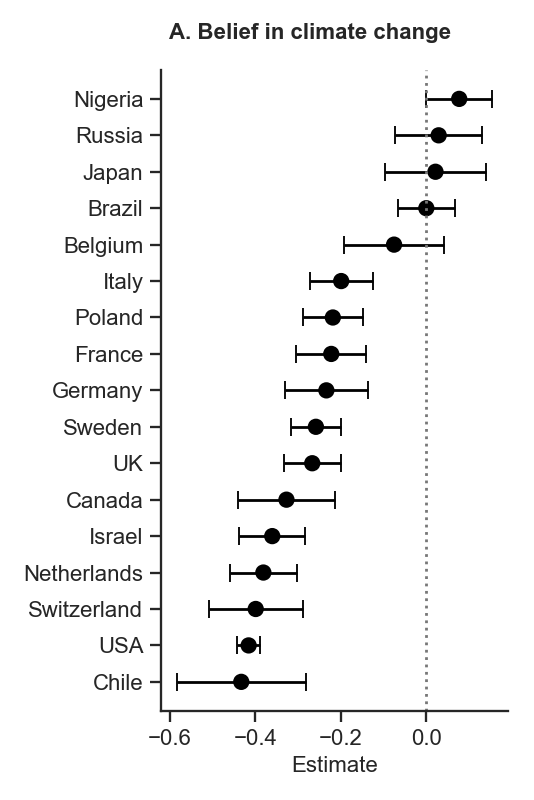

In [28]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Belief_Ide["country"], x=Belief_Ide["est."], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Belief_Ide["est."], y=Belief_Ide["country"], xerr=[Belief_Ide["est."] - Belief_Ide["lower"], Belief_Ide["upper"] - Belief_Ide["est."]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")

plt.title("A. Belief in climate change", fontweight='bold',  y=1.03, x = .43, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Belief_Ide.pdf', dpi=900, format="pdf")


In [29]:
# Import the policy point estimates

Policy_Ide = pd.read_excel("Policy_Ide.xlsx")

# Sort by descending

Policy_Ide = Policy_Ide.sort_values(by=['est'], ascending=False)
Policy_Ide

,country,lower,est,upper
10,Nigeria,0.084789,0.141238,0.197687
8,Japan,-0.077355,0.005586,0.088528
12,Russia,-0.088177,-0.014782,0.058614
0,Belgium,-0.121740,-0.039425,0.042891
1,Brazil,-0.094330,-0.045825,0.002680
11,Poland,-0.163613,-0.113874,-0.064134
4,France,-0.185647,-0.127575,-0.069502
7,Italy,-0.222410,-0.170810,-0.119210
15,UK,-0.258687,-0.211447,-0.164207
6,Israel,-0.272573,-0.216244,-0.159915


<IPython.core.display.Javascript object>


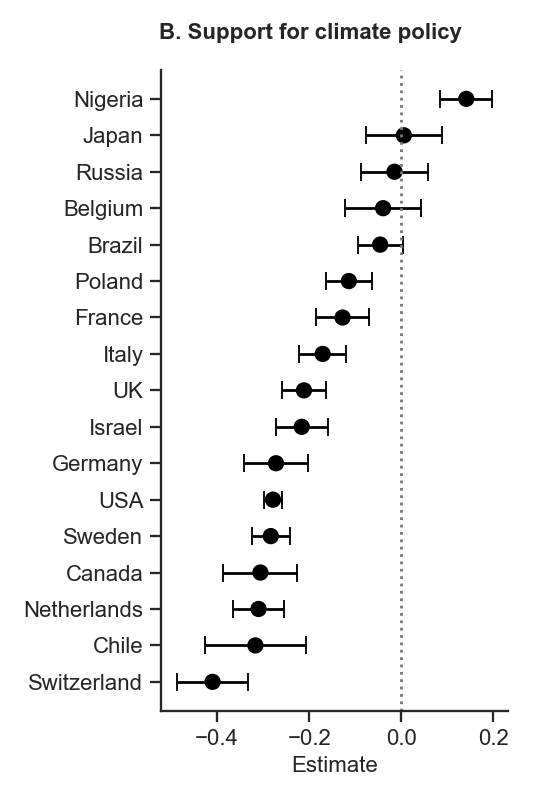

In [30]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Policy_Ide["country"], x=Policy_Ide["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Policy_Ide["est"], y=Policy_Ide["country"], xerr=[Policy_Ide["est"] - Policy_Ide["lower"], Policy_Ide["upper"] - Policy_Ide["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("B. Support for climate policy", fontweight='bold',  y=1.03, x = .43, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Policy_Ide.pdf', dpi=900, format="pdf")

In [31]:
# Import the sharing point estimates

Share_Ide = pd.read_excel("Share_Ide.xlsx")

# Sort by descending

Share_Ide = Share_Ide.sort_values(by=['est'], ascending=False)
Share_Ide

,country,lower,est,upper
0,Belgium,0.014502,0.041691,0.073387
2,Canada,0.008904,0.033238,0.061917
6,Israel,0.004092,0.022451,0.042261
15,UK,0.003993,0.017446,0.031528
5,Germany,-0.003737,0.015983,0.036753
7,Italy,0.000875,0.015090,0.029804
10,Nigeria,-0.005430,0.011977,0.029443
13,Sweden,-0.007667,0.003546,0.014859
9,Netherlands,-0.017159,0.000741,0.018815
12,Russia,-0.024087,0.000560,0.024069


<IPython.core.display.Javascript object>


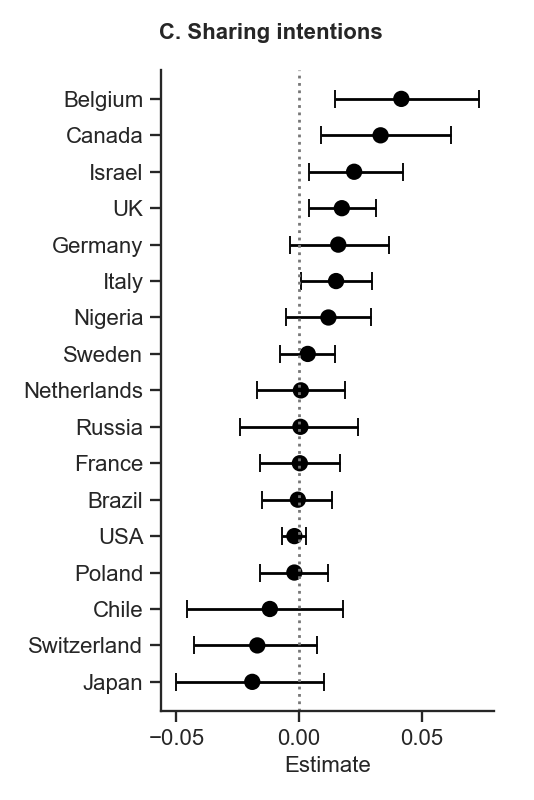

In [32]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Share_Ide["country"], x=Share_Ide["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Share_Ide["est"], y=Share_Ide["country"], xerr=[Share_Ide["est"] - Share_Ide["lower"], Share_Ide["upper"] - Share_Ide["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("C. Sharing intentions", fontweight='bold',  y=1.03, x = .33, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Share_Ide.pdf', dpi=900, format="pdf")

In [33]:
# Import the action point estimates

Action_Ide = pd.read_excel("Action_Ide.xlsx")

# Sort by descending

Action_Ide = Action_Ide.sort_values(by=['est'], ascending=False)
Action_Ide

,country,lower,est,upper
4,France,-0.000522,0.011924,0.024654
8,Japan,-0.009661,0.009894,0.029376
1,Brazil,-0.004047,0.006806,0.017713
11,Poland,-0.007707,0.003600,0.015000
16,USA,-0.003116,0.000977,0.005060
15,UK,-0.008586,0.000919,0.010432
10,Nigeria,-0.013508,-0.001707,0.010003
0,Belgium,-0.019492,-0.002489,0.014333
14,Switzerland,-0.019895,-0.002935,0.013765
6,Israel,-0.016656,-0.005943,0.004708


<IPython.core.display.Javascript object>


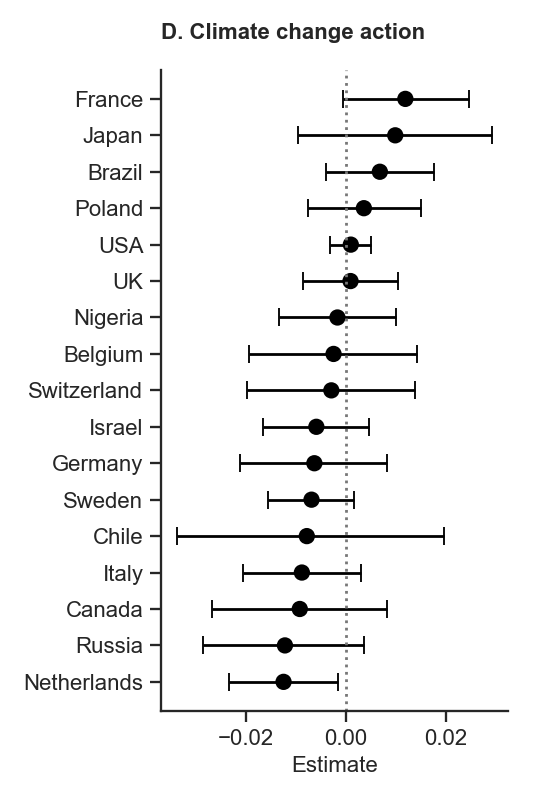

In [34]:
# Point plot using estimates + CIs from lmer models.

pal = ["Black"]
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

sns.pointplot(y=Action_Ide["country"], x=Action_Ide["est"], orient="h", palette=pal, join=False, capsize=0.4, ax=ax)

plt.errorbar(x=Action_Ide["est"], y=Action_Ide["country"], xerr=[Action_Ide["est"] - Action_Ide["lower"], Action_Ide["upper"] - Action_Ide["est"]], fmt='none', markersize=8, capsize=5, color = 'black')
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("D. Climate change action", fontweight='bold',  y=1.03, x = .38, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()
plt.axvline(x=0, c="#777777", ls=":")

plt.tight_layout()

plt.show()

# plt.savefig('Action_Ide.pdf', dpi=900, format="pdf")

# Congruency for belief among liberals 

In [35]:
# Load in the data

Congruency_Belief_Lib = pd.read_csv("Congruency_Belief_Lib.csv")

# Sort by descending

Congruency_Belief_Lib = Congruency_Belief_Lib.sort_values(by=['est.'], ascending=False)
Congruency_Belief_Lib

,Unnamed: 0,Country,Congruency,Ideology,lower,est.,upper
7,8,Chile,Incongruent,Liberal,69.511012,97.520439,125.529866
5,6,Canada,Incongruent,Liberal,30.407580,54.981850,79.556120
16,17,Japan,Congruent,Liberal,-0.958149,17.756373,36.470895
18,19,Netherlands,Congruent,Liberal,-3.459301,15.161811,33.782923
2,3,Brazil,Congruent,Liberal,-5.074466,9.273954,23.622375
25,26,Switzerland,Incongruent,Liberal,-1.352656,8.530381,18.413418
26,27,USA,Congruent,Liberal,5.575420,8.237814,10.900209
20,21,Poland,Congruent,Liberal,-8.159625,6.743277,21.646178
23,24,Sweden,Incongruent,Liberal,0.455161,5.775591,11.096022
14,15,Italy,Congruent,Liberal,-20.351670,5.720039,31.791747


<IPython.core.display.Javascript object>


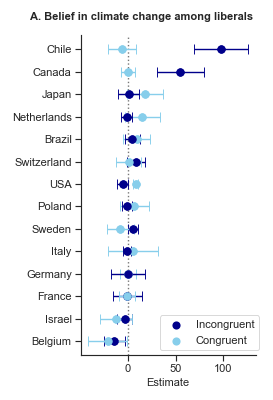

In [37]:
# Point plot using estimates + CIs from lmer models.

# Colors 
palette = {'Congruent':'skyblue' , 'Incongruent': 'darkblue'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4.1, 6))

# Make point plot
sns.pointplot(
    y=Congruency_Belief_Lib["Country"],
    x=Congruency_Belief_Lib["est."],
    hue=Congruency_Belief_Lib["Congruency"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("A. Belief in climate change among liberals", fontweight='bold',  y=1.03, x = .35, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Congruency_Belief_Lib.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Congruency"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Add a legend
ax.legend(loc='lower right', bbox_to_anchor=(1.05, 0.0))

plt.tight_layout()
plt.show()

# plt.savefig('Belief_Congruency_Lib.pdf', dpi=900, format="pdf")


# Congruency belief among conservatives 

In [38]:
# Load in the data

Congruency_Belief_Con = pd.read_csv("Congruency_Belief_Con.csv")

# Sort by descending

Congruency_Belief_Con = Congruency_Belief_Con.sort_values(by=['est.'], ascending=False)
Congruency_Belief_Con

,Unnamed: 0,Country,Congruency,Ideology,lower,est.,upper
23,24,Belgium,Incongruent,Conservative,34.300853,65.803225,97.305598
7,8,France,Congruent,Conservative,2.474195,29.258705,56.043215
17,18,Japan,Incongruent,Conservative,-15.135750,8.739702,32.615153
5,6,Israel,Congruent,Conservative,2.795054,8.581360,14.367666
6,7,Germany,Congruent,Conservative,-15.038861,6.010359,27.059579
14,15,USA,Incongruent,Conservative,3.776649,5.830180,7.883711
8,9,Canada,Congruent,Conservative,-16.751136,4.618625,25.988387
11,12,Brazil,Congruent,Conservative,-0.970300,4.139739,9.249778
4,5,Italy,Congruent,Conservative,-5.904276,3.997225,13.898726
1,2,Poland,Congruent,Conservative,-3.269678,3.458282,10.186241


<IPython.core.display.Javascript object>


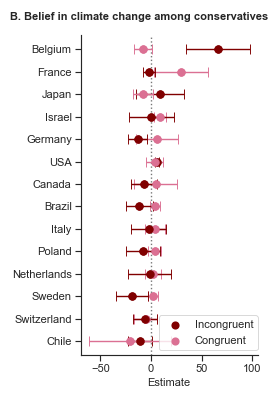

In [46]:
# Point plot using estimates + CIs from lmer models.

# Colors 
palette = {'Congruent':'palevioletred' , 'Incongruent': 'maroon'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4.1, 6))

# Make point plot
sns.pointplot(
    y=Congruency_Belief_Con["Country"],
    x=Congruency_Belief_Con["est."],
    hue=Congruency_Belief_Con["Congruency"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("B. Belief in climate change among conservatives", fontweight='bold',  y=1.03, x = .33, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Congruency_Belief_Con.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Congruency"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Add a legend
ax.legend(loc='lower right', bbox_to_anchor=(1.03, 0.0))

plt.tight_layout()
plt.show()

# plt.savefig('Belief_Congruency_Con.pdf', dpi=900, format="pdf")


In [48]:
# Load in the data

Congruency_Policy_Lib = pd.read_csv("Congruency_Policy_Lib.csv")

# Sort by descending

Congruency_Policy_Lib = Congruency_Policy_Lib.sort_values(by=['est.'], ascending=False)
Congruency_Policy_Lib

,Unnamed: 0,Country,Congruency,Ideology,lower,est.,upper
14,15,Italy,Congruent,Liberal,9.763347,28.092177,46.421007
5,6,Canada,Incongruent,Liberal,7.504015,24.747645,41.991275
2,3,Brazil,Congruent,Liberal,3.633912,14.021674,24.409436
20,21,Poland,Congruent,Liberal,2.337285,12.990224,23.643164
18,19,Netherlands,Congruent,Liberal,-3.094637,10.088717,23.272070
7,8,Chile,Incongruent,Liberal,-11.417473,8.610633,28.638739
8,9,France,Congruent,Liberal,0.621512,6.445426,12.269339
11,12,Germany,Incongruent,Liberal,-6.943540,5.950217,18.843975
26,27,USA,Congruent,Liberal,3.361340,5.248804,7.136267
6,7,Chile,Congruent,Liberal,-5.829026,4.626523,15.082073


<IPython.core.display.Javascript object>


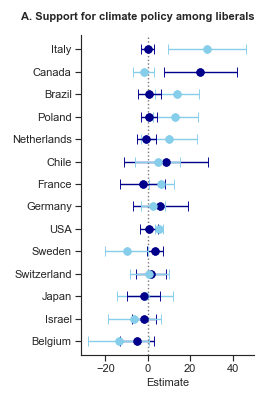

In [51]:
# Point plot using estimates + CIs from lmer models.

# Colors 
palette = {'Congruent':'skyblue' , 'Incongruent': 'darkblue'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4, 6))

# Make point plot
sns.pointplot(
    y=Congruency_Policy_Lib["Country"],
    x=Congruency_Policy_Lib["est."],
    hue=Congruency_Policy_Lib["Congruency"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("A. Support for policies among liberals", fontweight='bold',  y=1.03, x = .33, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Congruency_Policy_Lib.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Congruency"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Add a legend
# ax.legend(loc='lower right', bbox_to_anchor=(1, 0.0))

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Policy_Congruency_Lib.pdf', dpi=900, format="pdf")


In [53]:
# Load in the data

Congruency_Policy_Con = pd.read_csv("Congruency_Policy_Con.csv")

# Sort by descending

Congruency_Policy_Con = Congruency_Policy_Con.sort_values(by=['est.'], ascending=False)
Congruency_Policy_Con

,Unnamed: 0,Country,Congruency,Ideology,lower,est.,upper
1,2,Belgium,Incongruent,Conservative,14.888616,37.708141,60.527666
8,9,France,Congruent,Conservative,-5.226686,13.665453,32.557592
15,16,Italy,Incongruent,Conservative,-2.265555,9.797872,21.861298
13,14,Israel,Incongruent,Conservative,-8.193563,8.002428,24.198419
12,13,Israel,Congruent,Conservative,0.462462,4.634703,8.806943
2,3,Brazil,Congruent,Conservative,0.751117,4.464794,8.178471
23,24,Sweden,Incongruent,Conservative,-7.317774,4.172951,15.663677
21,22,Poland,Incongruent,Conservative,-7.726384,4.164220,16.054825
27,28,USA,Incongruent,Conservative,2.197701,3.653800,5.109899
22,23,Sweden,Congruent,Conservative,-0.288570,3.003687,6.295943


<IPython.core.display.Javascript object>


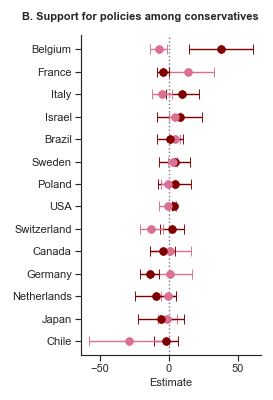

In [56]:
# Point plot using estimates + CIs from lmer models.

# Colors
palette = {'Congruent':'palevioletred' , 'Incongruent': 'maroon'}

# Create figure 
fig, ax = plt.subplots(1, 1, figsize=(4.1, 6))

# Make point plot
sns.pointplot(
    y=Congruency_Policy_Con["Country"],
    x=Congruency_Policy_Con["est."],
    hue=Congruency_Policy_Con["Congruency"],
    orient="h",
    palette=palette,
    join=False,
    capsize=0.4,
    ax=ax
)

# Label plot 
plt.xlabel("Estimate")
plt.ylabel("")
plt.title("B. Support for policies among conservatives", fontweight='bold',  y=1.03, x = .33, fontsize=12)

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

sns.despine()

plt.axvline(x=0, c="#777777", ls=":")

# Adding error bars using a loop such that red is conservative and blue is liberal
for i, row in Congruency_Policy_Con.iterrows(): # For each row of the data frame 
    x = row["est."]
    y = row["Country"]
    lower = row["lower"]
    upper = row["upper"]
    ideology = row["Congruency"]
    color = palette[ideology] # Use color based on ideology

    plt.errorbar(
        x=x,
        y=y,
        xerr=[[x - lower], [upper - x]],
        fmt='o',
        markersize=8,
        capsize=5,
        color=color
    )

# Add a legend
# ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0.0))

# Remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# plt.savefig('Policy_Congruency_Con.pdf', dpi=900, format="pdf")
